In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/aviation-crashed-flights-data/flight.csv')

In [3]:
df.head()

,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg
0,0,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,1,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,2,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,3,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,4,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o


In [4]:
df.tail()

,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg
2495,1245,20 Dec 2018,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o
2496,1246,22 Dec 2018,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0,Kamarata Airport (KTV),sub
2497,1247,24 Dec 2018,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0,Beni Airport (BNC),w/o
2498,1248,31 Dec 2018,Boeing 757-2B7 (WL),N938UW,American Airlines,0,"Charlotte-Douglas International Airport, NC (C...",sub
2499,1249,unk. date 2018,Rockwell Sabreliner 80,N337KL,private,0,"Eugene Airport, OR (EUG)",sub


In [5]:
df.sample(5)

,Unnamed: 0,acc.date,type,reg,operator,fat,location,dmg
2025,775,9 Jun 2019,Antonov An-2R,RA-81519,Feniks,0,"50 km NE of Kyren, Tunkinsky District",sub
484,484,23 Feb 2020,Bombardier CL-600-2B16 Challenger 605,C-GKCP,Canadian Pacific Railway Company,0,"Calgary International Airport, AB (YYC)",sub
182,182,7 Nov 2022,ATR 72-600 (72-212A),JA06JC,Japan Air Commuter,0,Kagoshima Airport (KOJ/RJFK),non
2080,830,4 Aug 2019,Antonov An-2,RT-15-305,DOSAAF Tajikistan,1,near Fakhrabad,w/o
721,721,12 Mar 2019,Beechcraft A100 King Air,N945WS,Golden Wings Aviation Inc.,0,"Latrobe-Westmoreland County Airport, PA (LBE)",sub


In [6]:
df.shape

(2500, 8)

In [7]:
df = df.drop("Unnamed: 0", axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   acc.date  2500 non-null   object
 1   type      2500 non-null   object
 2   reg       2408 non-null   object
 3   operator  2486 non-null   object
 4   fat       2488 non-null   object
 5   location  2500 non-null   object
 6   dmg       2500 non-null   object
dtypes: object(7)
memory usage: 136.8+ KB


In [9]:
df.columns

Index(['acc.date', 'type', 'reg', 'operator', 'fat', 'location', 'dmg'], dtype='object')

In [10]:
# Number of unique values
df.nunique()

acc.date     871
type         523
reg         1194
operator     827
fat           47
location    1059
dmg            6
dtype: int64

In [11]:
df.describe(include="all")

,acc.date,type,reg,operator,fat,location,dmg
count,2500,2500,2408,2486,2488,2500,2500
unique,871,523,1194,827,47,1059,6
top,3 Mar 2020,Cessna 208B Grand Caravan,unreg.,private,0,"Chicago-O'Hare International Airport, IL (ORD/...",sub
freq,24,114,6,206,2068,28,1330


# ***Missing Data Analysis*** 

In [12]:
df.isna().sum()

acc.date     0
type         0
reg         92
operator    14
fat         12
location     0
dmg          0
dtype: int64

In [13]:
# Percentage of null values per column
missing_data = df.isna().mean()*100
print (missing_data)

acc.date    0.00
type        0.00
reg         3.68
operator    0.56
fat         0.48
location    0.00
dmg         0.00
dtype: float64


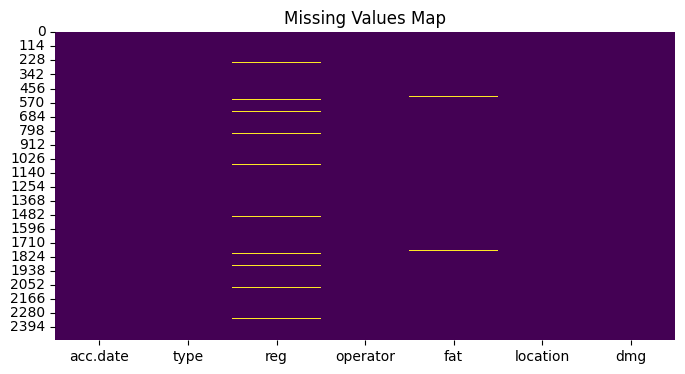

In [14]:
# Visualization
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(),cbar=False,cmap= "viridis")
plt.title("Missing Values Map")
plt.show()

# ***Duplicate Data Analysis***

In [15]:
df.duplicated().sum()

1250

In [16]:
df[df.duplicated()]

,acc.date,type,reg,operator,fat,location,dmg
1250,3 Jan 2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1251,4 Jan 2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
1252,5 Jan 2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
1253,8 Jan 2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
1254,12 Jan 2022,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o
...,...,...,...,...,...,...,...
2495,20 Dec 2018,Cessna 560 Citation V,N188CW,Chen Aircrafts LLC,4,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o
2496,22 Dec 2018,PZL-Mielec M28 Skytruck,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0,Kamarata Airport (KTV),sub
2497,24 Dec 2018,Antonov An-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0,Beni Airport (BNC),w/o
2498,31 Dec 2018,Boeing 757-2B7 (WL),N938UW,American Airlines,0,"Charlotte-Douglas International Airport, NC (C...",sub


In [17]:
first_half = df.iloc[:1250]
second_half = df.iloc[1250:]

(first_half.reset_index(drop=True) == second_half.reset_index(drop=True)).all().all()

False

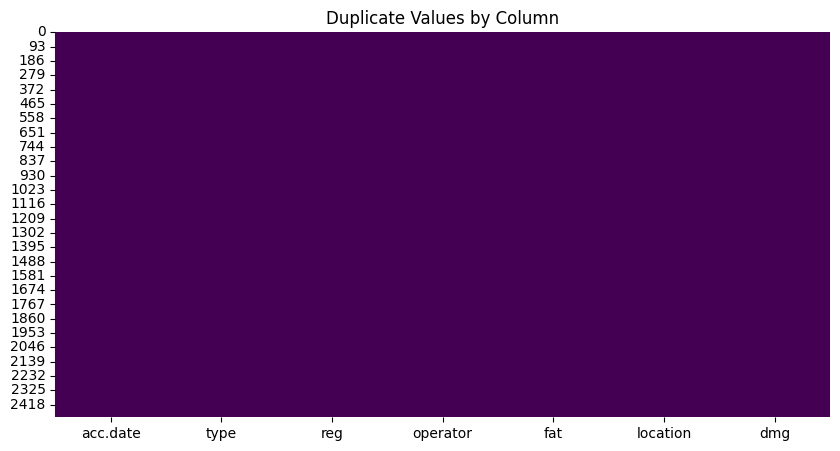

In [18]:
# Visualizing Duplicates
# sns.heatmap() expects a 2D matrix (like df.isnull()), not a 1D series (duplicated() returns a 1D boolean series)
# Create a matrix where True = Duplicate value in its column
dup_matrix = df.apply(lambda col : col.duplicated(keep=False))
plt.figure(figsize=(10, 5))
sns.heatmap(dup_matrix, cbar=False, cmap='viridis')
plt.title('Duplicate Values by Column')
plt.show()

# **Univariate Analysis: Variable by Variable**

***1.Temporal Analysis The "acc.date" variable***

In [19]:
df["acc.date"]

0           3 Jan 2022
1           4 Jan 2022
2           5 Jan 2022
3           8 Jan 2022
4          12 Jan 2022
             ...      
2495       20 Dec 2018
2496       22 Dec 2018
2497       24 Dec 2018
2498       31 Dec 2018
2499    unk. date 2018
Name: acc.date, Length: 2500, dtype: object

In [20]:
# Analyse the format of the acc.date
df[~df["acc.date"].str.match(r"\d{1,2} \w{3} \d{4}", na=False)]

,acc.date,type,reg,operator,fat,location,dmg
101,xx Jun 2022,Antonov An-2R,RA-17951,Voskhod LLC,0,near Oymyakon Airfield,sub
233,xx Jan 2021,Antonov An-2,NaN,Korean People's Army Air and Anti-Air Force (K...,5,near Taechon Air Base,w/o
1249,unk. date 2018,Rockwell Sabreliner 80,N337KL,private,0,"Eugene Airport, OR (EUG)",sub
1351,xx Jun 2022,Antonov An-2R,RA-17951,Voskhod LLC,0,near Oymyakon Airfield,sub
1483,xx Jan 2021,Antonov An-2,NaN,Korean People's Army Air and Anti-Air Force (K...,5,near Taechon Air Base,w/o
2499,unk. date 2018,Rockwell Sabreliner 80,N337KL,private,0,"Eugene Airport, OR (EUG)",sub


In [21]:
# Convert acc.date to datetimme 
df["acc.date"]= pd.to_datetime(df["acc.date"], errors ="coerce")

In [22]:
df["acc.date"]

0      2022-01-03
1      2022-01-04
2      2022-01-05
3      2022-01-08
4      2022-01-12
          ...    
2495   2018-12-20
2496   2018-12-22
2497   2018-12-24
2498   2018-12-31
2499          NaT
Name: acc.date, Length: 2500, dtype: datetime64[ns]

In [23]:
df.loc[1249]

acc.date                         NaT
type          Rockwell Sabreliner 80
reg                           N337KL
operator                     private
fat                                0
location    Eugene Airport, OR (EUG)
dmg                              sub
Name: 1249, dtype: object

In [24]:
df[df["acc.date"].isna()]

,acc.date,type,reg,operator,fat,location,dmg
101,NaT,Antonov An-2R,RA-17951,Voskhod LLC,0,near Oymyakon Airfield,sub
233,NaT,Antonov An-2,NaN,Korean People's Army Air and Anti-Air Force (K...,5,near Taechon Air Base,w/o
1249,NaT,Rockwell Sabreliner 80,N337KL,private,0,"Eugene Airport, OR (EUG)",sub
1351,NaT,Antonov An-2R,RA-17951,Voskhod LLC,0,near Oymyakon Airfield,sub
1483,NaT,Antonov An-2,NaN,Korean People's Army Air and Anti-Air Force (K...,5,near Taechon Air Base,w/o
2499,NaT,Rockwell Sabreliner 80,N337KL,private,0,"Eugene Airport, OR (EUG)",sub


In [25]:
df["acc.date"].isna().sum()

6

In [26]:
# Drop rows with invalid acc.date
df = df.dropna(subset=["acc.date"])
# Remove rows with NaN in acc.date, but keep all columns. Output type: DataFrame.
# Warning:
# df = df["acc.date"].dropna()
# Keeps only the acc.date column without NaN. Output type: 1D Series.

In [27]:
df["acc.date"].isna().sum()

0

In [28]:
# Extract year/month
df["year"] = df["acc.date"].dt.year
df["month"] = df["acc.date"].dt.month

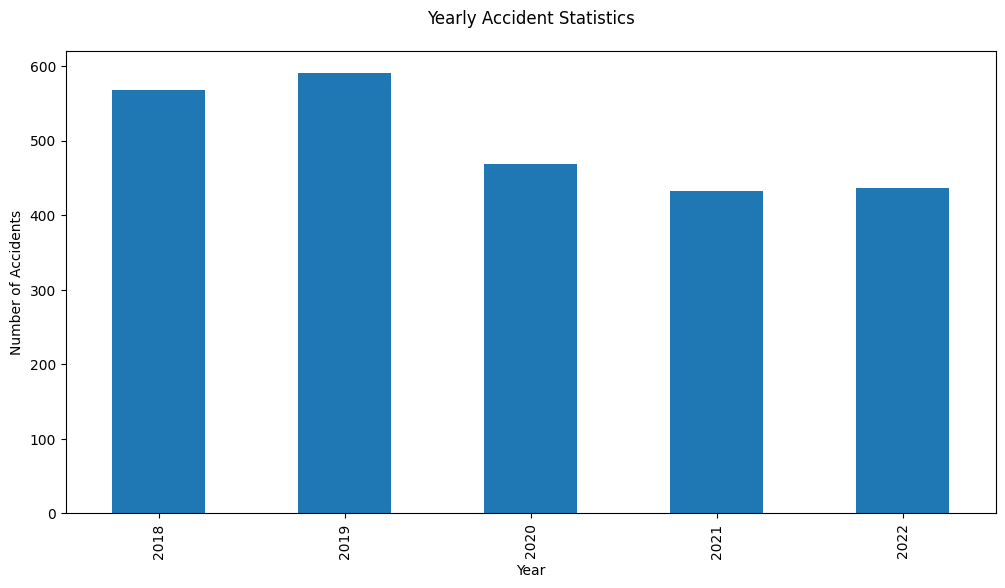

In [29]:
# Accidents Per Year
plt.figure(figsize=(12,6))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Yearly Accident Statistics', pad=20)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

***2. Aircraft Type Analysis: "type" variable***

<Axes: xlabel='fat', ylabel='type'>

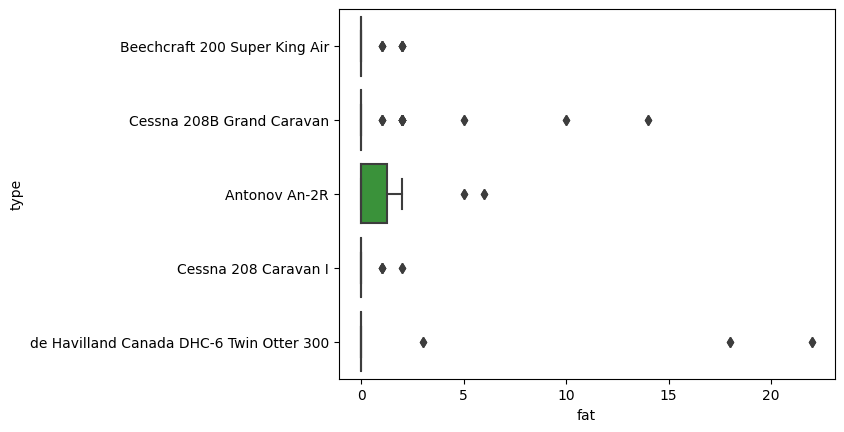

In [30]:
# Boxplot by Aircraft Type
df['fat'] = pd.to_numeric(df['fat'], errors='coerce')  # Convert to numeric
sns.boxplot(y="type", x="fat", data=df[df["type"].isin(df["type"].value_counts().head(5).index)])

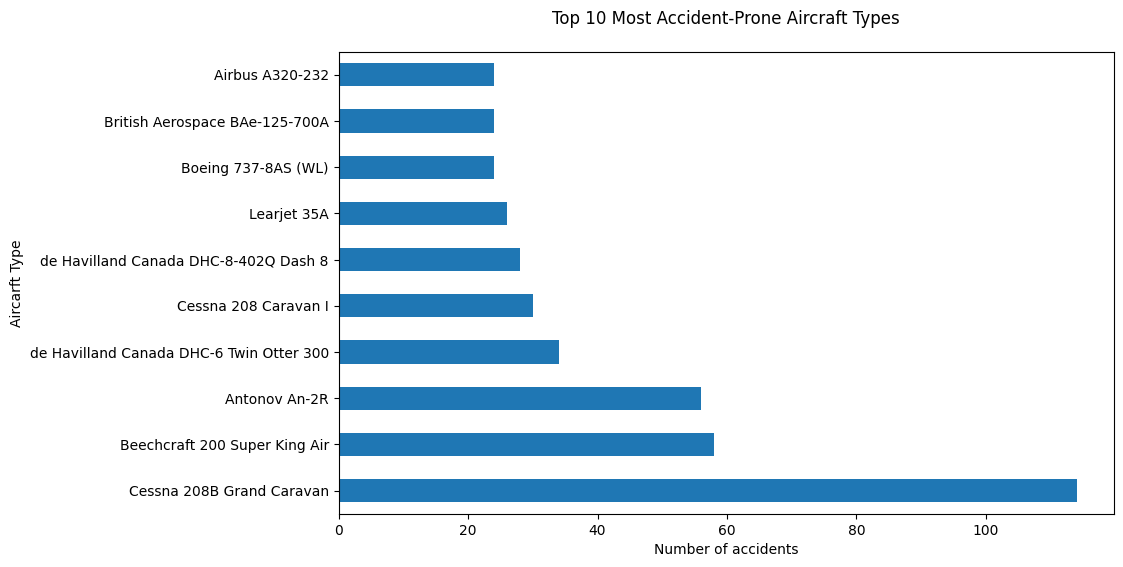

In [31]:
# Top 10 Most Accident-Prone Aircraft Types
top_types = df["type"].value_counts().head(10)
# print(top_types)

# Visualization
plt.figure(figsize = (10,6))
top_types.plot(kind='barh')
plt.title("Top 10 Most Accident-Prone Aircraft Types", pad=20)
plt.xlabel("Number of accidents")
plt.ylabel("Aircarft Type")
plt.show()

***3. Operator Analysis: "operator" variable***

In [32]:
df["operator"].value_counts()

operator
private                                             204
American Airlines                                    44
Delta Air Lines                                      44
Unknown                                              38
Southwest Airlines                                   36
                                                   ... 
Malu Aviation                                         2
Aeromedevac Air Ambulance                             2
Sky-Bound Aviation LLC                                2
Halsted Aviation Corporation (HAC)                    2
Guardia Nacional Bolivariana de Venezuela - GNBV      2
Name: count, Length: 826, dtype: int64

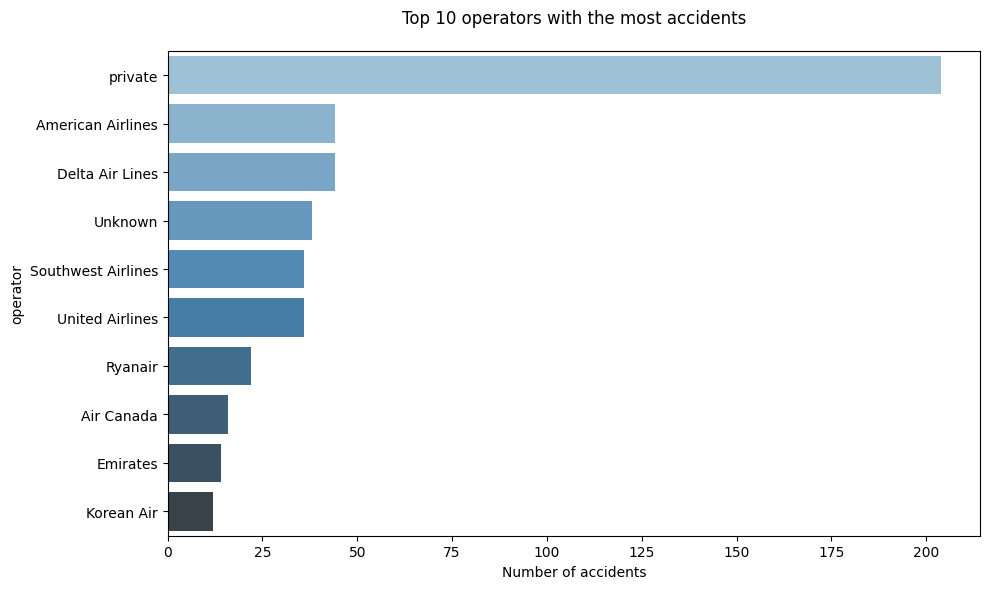

In [33]:
# Visualize the top 10 most frequent operators in accidents
plt.figure(figsize=(10,6)) 
sns.countplot(y="operator", 
             data=df,
             order=df["operator"].value_counts().iloc[:10].index,
             palette="Blues_d")  
plt.title("Top 10 operators with the most accidents", pad=20)
plt.xlabel("Number of accidents")
plt.tight_layout()

In [34]:
df["operator"].describe()

count        2480
unique        826
top       private
freq          204
Name: operator, dtype: object

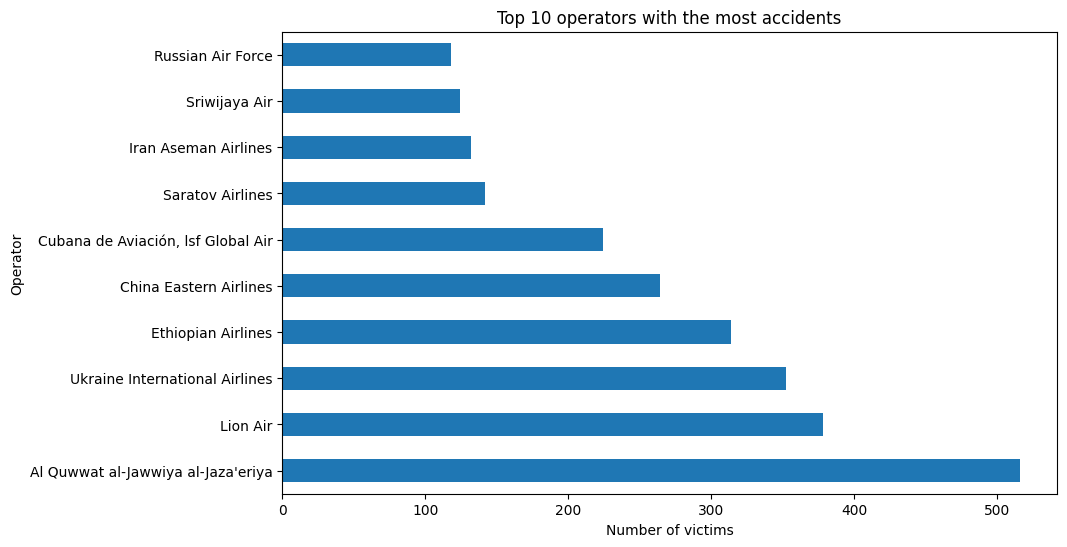

In [35]:
# Top 10 operators with the most accidents - Aviation Safety Analysis
# Operator-Victim Relationship Analysis
operator_fat = df.groupby('operator')["fat"].sum().sort_values(ascending=False).head(10)
operator_fat.plot(kind='barh', figsize=(10,6))
plt.title('Top 10 operators with the most accidents')
plt.xlabel("Number of victims")
plt.ylabel("Operator")
plt.show()

***4. Victim Analysis: "fat" variable***

In [36]:
df["fat"].describe()

count    2444.000000
mean        1.860884
std        13.198517
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       257.000000
Name: fat, dtype: float64

In [37]:
df["fat"].isna().sum()

50

In [38]:
# Drop rows with invalid/ inexistent fat value 
df= df.dropna(subset=["fat"])

In [39]:
df["fat"].isna().sum()

0

In [40]:
df["fat"].value_counts()

fat
0.0      2064
1.0        86
2.0        70
3.0        38
4.0        38
5.0        22
6.0        14
9.0        12
7.0        12
10.0        8
8.0         8
11.0        8
12.0        6
15.0        4
13.0        4
20.0        4
14.0        4
18.0        4
66.0        2
38.0        2
71.0        2
257.0       2
39.0        2
51.0        2
112.0       2
41.0        2
16.0        2
157.0       2
26.0        2
21.0        2
176.0       2
28.0        2
62.0        2
19.0        2
22.0        2
132.0       2
189.0       2
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


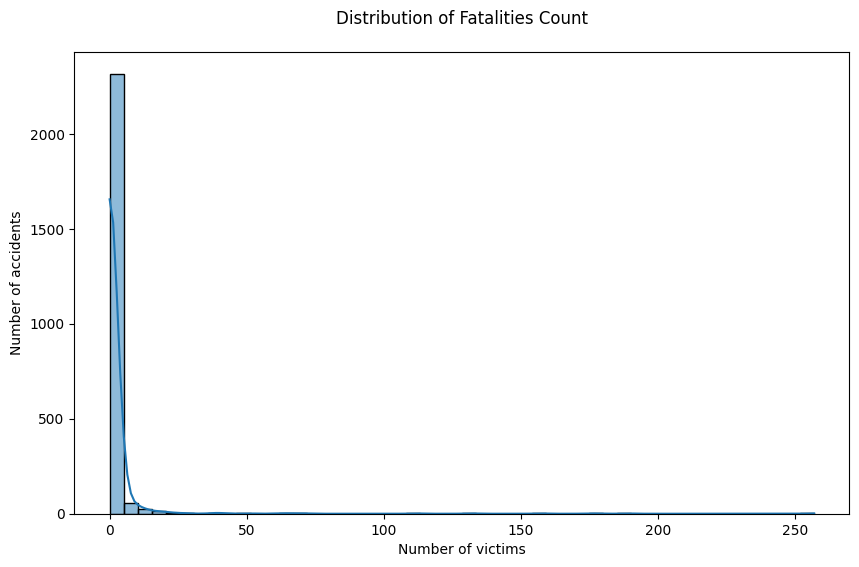

In [41]:
# Distribution of Fatalities Count
plt.figure(figsize=(10,6))
sns.histplot(df['fat'], bins=50, kde=True)
plt.title('Distribution of Fatalities Count', pad=20)
plt.xlabel("Number of victims")
plt.ylabel("Number of accidents")
plt.show()

In [42]:
# Deadliest Accidents Analysis
deadliest = df.sort_values('fat', ascending=False).head(10)
print(deadliest[['acc.date', 'type', 'operator', 'fat', 'location']])

       acc.date                 type                            operator  \
1039 2018-04-11     Ilyushin Il-76TD  Al Quwwat al-Jawwiya al-Jaza'eriya   
2289 2018-04-11     Ilyushin Il-76TD  Al Quwwat al-Jawwiya al-Jaza'eriya   
2459 2018-10-29     Boeing 737 MAX 8                            Lion Air   
1209 2018-10-29     Boeing 737 MAX 8                            Lion Air   
444  2020-01-08  Boeing 737-8KV (WL)      Ukraine International Airlines   
1694 2020-01-08  Boeing 737-8KV (WL)      Ukraine International Airlines   
719  2019-03-10     Boeing 737 MAX 8                  Ethiopian Airlines   
1969 2019-03-10     Boeing 737 MAX 8                  Ethiopian Airlines   
1299 2022-03-21  Boeing 737-89P (WL)              China Eastern Airlines   
49   2022-03-21  Boeing 737-89P (WL)              China Eastern Airlines   

        fat                                     location  
1039  257.0                       near Boufarik Air Base  
2289  257.0                       near Boufar

***5. Geographic Analysis: "location" variable***

In [43]:
df["location"].describe()

count                                                  2444
unique                                                 1033
top       Chicago-O'Hare International Airport, IL (ORD/...
freq                                                     28
Name: location, dtype: object

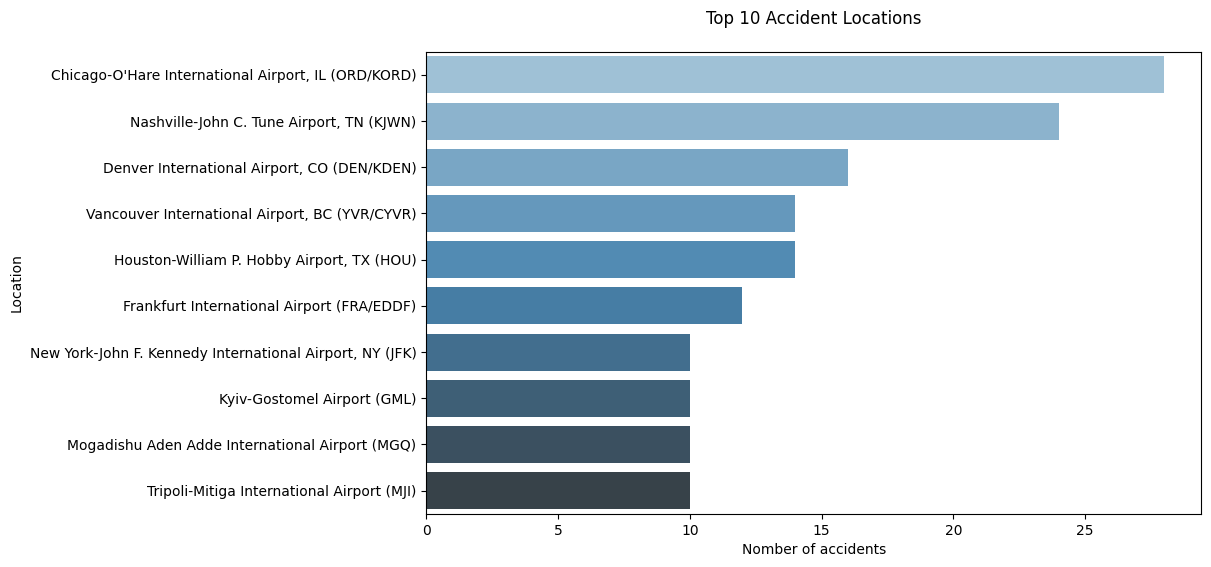

In [44]:
# Top 10 Accident Locations
# Distribution 
plt.figure(figsize=(10,6))
sns.countplot(y="location", 
             data=df,
             order=df["location"].value_counts().iloc[:10].index,
             palette="Blues_d")  
plt.title("Top 10 Accident Locations", pad=20)
plt.xlabel("Nomber of accidents")
plt.ylabel("Location")
plt.show()

***6. Damage Analysis: "dmg" variable***

dmg
sub    1314
w/o     672
non     334
min      94
unk      30
Name: count, dtype: int64


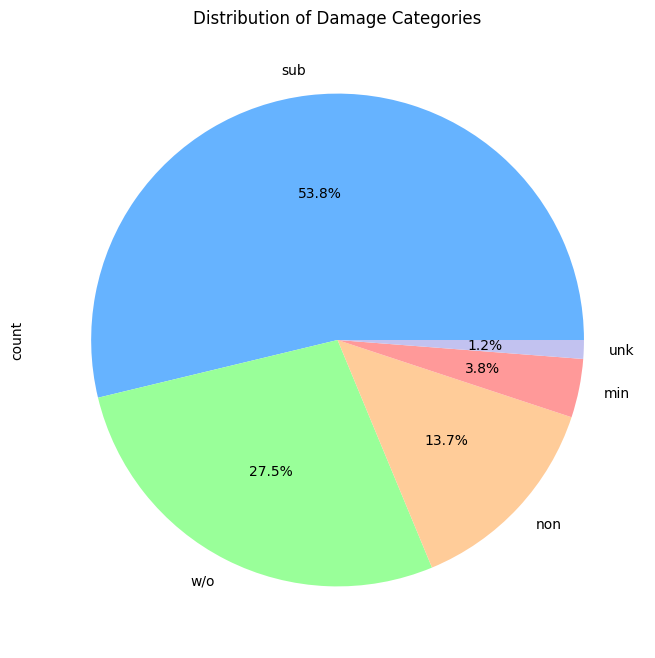

In [45]:
# Frequency of Damage Categories
dmg_counts = df['dmg'].value_counts()
print(dmg_counts)

# Visualisation
dmg_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8),
               colors=['#66b3ff', '#99ff99', '#ffcc99', '#ff9999', '#c2c2f0'])
plt.title('Distribution of Damage Categories')
plt.show()

# ***Cross-Analysis***

***1. Relationship between damage severity (dmg) and fatality count (fat)***

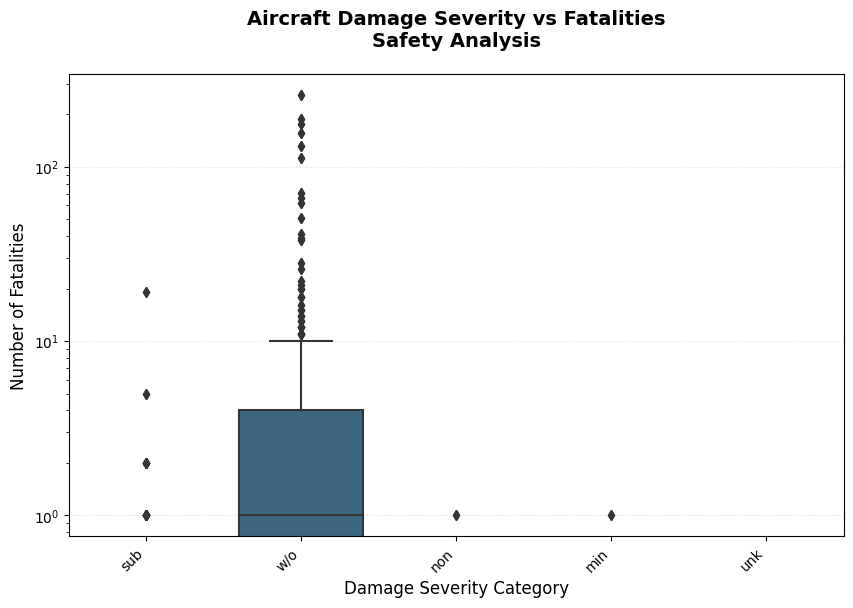

In [46]:
# Relationship between damage severity (dmg) and fatality count (fat)
df['fat'] = pd.to_numeric(df['fat'], errors='coerce')  # Convert to numeric
plt.figure(figsize=(10, 6))
sns.boxplot(x="dmg", y="fat", data=df, palette="viridis",
           #showfliers=False  # Better visualization without outliers)
           )
plt.title("Aircraft Damage Severity vs Fatalities\nSafety Analysis", fontsize=14, pad=20, fontweight='bold')
plt.xlabel("Damage Severity Category", fontsize=12)
plt.ylabel("Number of Fatalities", fontsize=12)
plt.xticks(rotation=45,  ha='right')  
plt.yscale('log')  # Better representation of fatality range            
plt.grid(axis="y", linestyle=":", alpha=0.4)
plt.show()


> Findings: Elevated Outliers
> 
> Key Observation:
>
> Several data points exceed 200 fatalities in "No Damage" (NONE) category, which is unexpected for accidents without structural damage.
> 
> Potential Causes:
> 
> Data entry error (most likely)
> Medical emergencies or panic-induced casualties (secondary possibility)
> Categorization error where damage was unreported but occurred


***2. Relationship between Aircraft type (type) and fatality count (fat)***

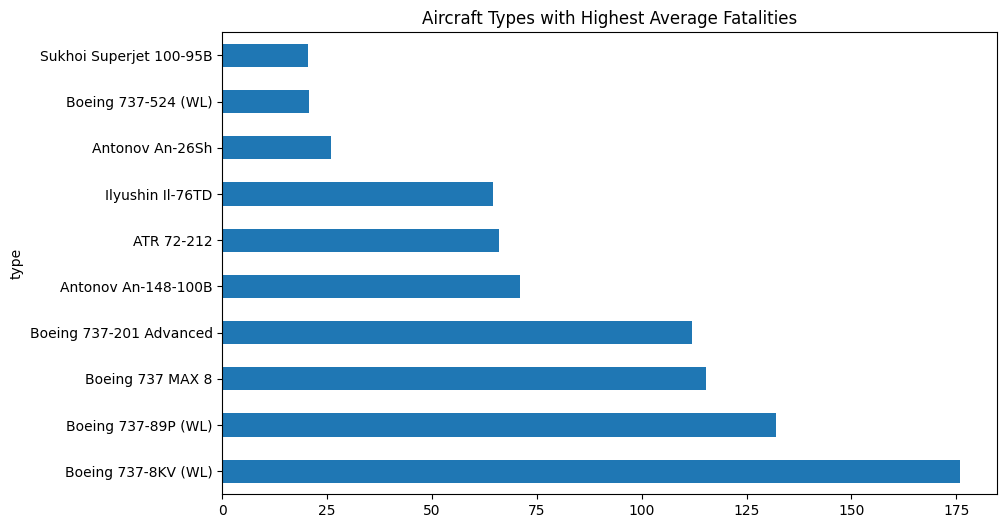

In [47]:
# Aircraft Type vs Average Fatality Count
type_fat = df.groupby('type')['fat'].mean().sort_values(ascending=False).head(10)
type_fat.plot(kind='barh', figsize=(10,6))
plt.title('Aircraft Types with Highest Average Fatalities')
plt.show()


***3. Correlation Matrix***

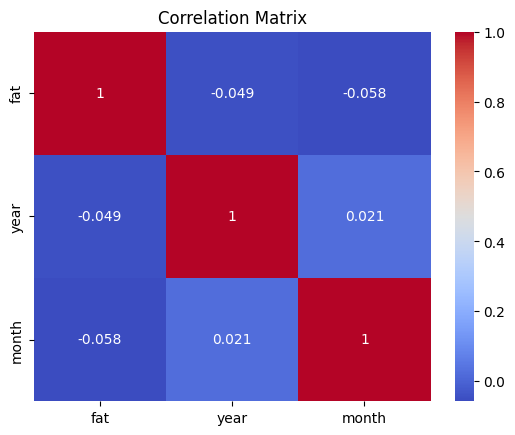

In [48]:
# Correlation Matrix (for numerical variables)
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# ***EDA Report***

In [49]:
# Generates a comprehensive automated EDA report using ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Rapport complet", explorative=True)
profile.to_file("rapport_EDA.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 9/9 [00:00<00:00, 34.70it/s]
/usr/local/lib/python3.11/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[9 9 9 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
/usr/local/lib/python3.11/dist-packages/ydata_profiling/model/pandas/discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 9 9 9]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]